In [1]:
import warnings
warnings.simplefilter('ignore')

# Marvin Results

This tutorial explores some basics of how to handle results of your Marvin Query.  Much of this information can also be found in the [Marvin Results documentation](https://sdss-marvin.readthedocs.io/en/latest/query/results.html).

Table of Contents:
- [Performing a Query](#query)<br>
- [Retrieving Results](#retrieve)<br>
- [Formatting Results](#format)<br>
- [Quickly Plotting Results](#plot)<br>
- [Downloading Results](#download)<br>

<a id='query'></a>
## Performing a Query
Our first step is to generate a query.  Let's perform a simple metadata query to look for all galaxies with a redshift < 0.1.  Let's also return the absolute magnitude g-r color and the Elliptical Petrosian half-light radius.  This step assumes familiarity with Marvin Queries.  To learn how to write queries, please see the [Marvin Query documentation](https://sdss-marvin.readthedocs.io/en/latest/query/query.html) or the [Marvin Query Tutorial](https://sdss-marvin.readthedocs.io/en/latest/tutorials/notebooks/marvin_queries.html).

In [2]:
# set up and run the query
from marvin.tools.query import Query
q = Query(search_filter='nsa.z < 0.1', return_params=['absmag_g_r', 'nsa.elpetro_th50_r'])
r = q.run()

[INFO]: No release version set. Setting default to DR15
[WARNING]: path /home/idies/workspace/sdss_sas/mangawork/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [3]:
# repr the results
r

Marvin Results(query=nsa.z < 0.1, totalcount=4275, count=100, mode=local)

Our query runs and indicates a total count of 4275 results.  By default, queries that return more than 1000 rows will be automatically paginated into sets (or chunks) of 100 rows, indicated by ``count=100``.  The number of rows queries return can be changed using the ``limit`` keyword argument to ``Qeuery``.  The results are stored in the ``results`` attribute.

In [4]:
# look at the results
r.results

<ResultSet(set=1.0/43, index=0:100, count_in_set=100, total=4275)>
[ResultRow(mangaid='1-109056', plateifu='8077-6103', elpetro_absmag_g_r=1.1170387268066406, elpetro_th50_r=3.709004, z=0.047301855),
 ResultRow(mangaid='1-109073', plateifu='8078-12704', elpetro_absmag_g_r=1.0597877502441406, elpetro_th50_r=7.5472426, z=0.043588243),
 ResultRow(mangaid='1-109081', plateifu='8077-12705', elpetro_absmag_g_r=1.2303180694580078, elpetro_th50_r=9.6066475, z=0.04385919),
 ResultRow(mangaid='1-109112', plateifu='8078-1901', elpetro_absmag_g_r=1.5319881439208984, elpetro_th50_r=2.255412, z=0.024970215),
 ResultRow(mangaid='1-109152', plateifu='8154-12702', elpetro_absmag_g_r=1.5439453125, elpetro_th50_r=16.126255, z=0.028173625),
 ResultRow(mangaid='1-109167', plateifu='8078-1902', elpetro_absmag_g_r=1.6565742492675781, elpetro_th50_r=1.913222, z=0.024634399),
 ResultRow(mangaid='1-109234', plateifu='9193-1901', elpetro_absmag_g_r=1.5257034301757812, elpetro_th50_r=2.1652818, z=0.04093087),
 Re

A ``ResultSet`` contains a list of tuple rows with some default parameters like ``mangaid`` and ``plateifu``, plus any parameters used in the ``Query`` ``search_filter`` or requested with the ``return_params`` keyword.  The redshift, g-r color, and half-light radius has been returned.  We can look at all the columns available using the ``columns`` attribute.   

In [5]:
# look at the columns returned by your results
r.columns

<ParameterGroup name=Columns, n_parameters=5>
 [<QueryParameter full=cube.mangaid, name=mangaid, short=mangaid, remote=mangaid, display=Manga-ID>,
 <QueryParameter full=cube.plateifu, name=plateifu, short=plateifu, remote=plateifu, display=Plate-IFU>,
 <QueryParameter full=nsa.elpetro_absmag_g_r, name=elpetro_absmag_g_r, short=absmag_g_r, remote=elpetro_absmag_g_r, display=Absmag g-r>,
 <QueryParameter full=nsa.elpetro_th50_r, name=elpetro_th50_r, short=th50_r, remote=elpetro_th50_r, display=r-band half-light radius>,
 <QueryParameter full=nsa.z, name=z, short=z, remote=z, display=Redshift>]

<a id='retrieve'></a>
## Retrieving Results
There are several options for handling paginated results.  To page through the sets of results without extending the results, use ``getNext`` and ``getPrevious``.  These methods simply page through.   

In [6]:
# get the next set of results
n = r.getNext()

[INFO]: Retrieving next 100, from 100 to 200


In [7]:
# look at page 2
r.results

<ResultSet(set=2.0/43, index=100:200, count_in_set=100, total=4275)>
[ResultRow(mangaid='1-121334', plateifu='8977-1902', elpetro_absmag_g_r=1.6729907989501953, elpetro_th50_r=2.038858, z=0.041755456),
 ResultRow(mangaid='1-121375', plateifu='8977-3701', elpetro_absmag_g_r=1.7335586547851562, elpetro_th50_r=2.5991359, z=0.08281895),
 ResultRow(mangaid='1-121387', plateifu='8977-1901', elpetro_absmag_g_r=1.3867549896240234, elpetro_th50_r=1.9763646, z=0.02816286),
 ResultRow(mangaid='1-121413', plateifu='8977-12704', elpetro_absmag_g_r=0.7462749481201172, elpetro_th50_r=8.373097, z=0.015870864),
 ResultRow(mangaid='1-121486', plateifu='8717-3704', elpetro_absmag_g_r=1.1885662078857422, elpetro_th50_r=5.8174176, z=0.02900766),
 ResultRow(mangaid='1-121523', plateifu='8977-12703', elpetro_absmag_g_r=2.0203609466552734, elpetro_th50_r=5.3151755, z=0.07524252),
 ResultRow(mangaid='1-121598', plateifu='8717-9102', elpetro_absmag_g_r=2.196910858154297, elpetro_th50_r=8.247149, z=0.07141149),


In [8]:
# get the previous set 
p = r.getPrevious()

[INFO]: Retrieving previous 100, from 0 to 100


To extend your results and keep them, use the ``extendSet`` method.  By default, extending a set grabs the next page of 100 results (defined by ``r.chunk``) and appends to the existing set of results.  Rerunning ``extendSet`` continues to append results until you've retrieved them all. To avoid running ``extendSet`` multiple times, you can run use the ``loop`` method, which will loop over all pages appending the data until you've retrieved all the results. 

In [9]:
# extend the set by one page
r.extendSet()
r

[INFO]: Retrieving next 100, from 100 to 200


Marvin Results(query=nsa.z < 0.1, totalcount=4275, count=200, mode=local)

We now have 200 results out of the 4275.  For results with a small number of total counts, you can attempt to retrieve all of the results with the ``getAll`` method.  Currently this method is limited to returning results containing 500,000 rows or rows with 25 columns.

#### Getting all the results
There are several options for getting all of the results.  
- Use the ``getAll`` method to attempt to retrieve all the results in one request. 
- Use the ``loop`` method to loop over all the pages to extend/append the results together
- Rerun the ``Query`` using a new ``limit`` to retrieve all the results. 


In [19]:
# get all the results
r.getAll()

We now have all the results.  We can extract columns of data by indexing the results list using the column name.  Let's extract the redshift and color.

In [12]:
# extract individual columns of data
redshift = r.results['nsa.z']
color = r.results['absmag_g_r']

<a id='format'></a>
## Formatting Results
You can convert the results to a variety of formats using the ``toXXX`` methods.  Common formats are **FITS**, **Astropy Table**, **Pandas Dataframe**, **JSON**, or **CSV**.  Only the FITS and CSV conversions will write the output to a file.  Astropy Tables and Pandas Dataframes have more options for writing out your dataset to a file.  Let's convert to Pandas Dataframe.

In [13]:
# convert the marvin results to a Pandas dataframe
df = r.toDF()
df.head()

,mangaid,plateifu,elpetro_absmag_g_r,elpetro_th50_r,z
0,1-109056,8077-6103,1.117039,3.709004,0.047302
1,1-109073,8078-12704,1.059788,7.547243,0.043588
2,1-109081,8077-12705,1.230318,9.606647,0.043859
3,1-109112,8078-1901,1.531988,2.255412,0.024970
4,1-109152,8154-12702,1.543945,16.126255,0.028174


You can also convert the data into Marvin objects using the ``convertToTool`` method.  This will attempt to convert each result row into its corresponding Marvin Object.  The default conversion is to a ``Cube`` object.  Converted objects are stored in the ``r.objects`` attribute.  Let's convert our results to cubes. **Depending on the number of results, this may take awhile.  Let's limit our conversion to 5.**  Once converted, we now have Marvin Tools at our disposal.

In [14]:
# convert the top 5 to cubes
r.convertToTool('cube', limit=5)

Converting results to Marvin Cube objects


In [15]:
# look at the objects
r.objects

[<Marvin Cube (plateifu='8077-6103', mode='local', data_origin='db')>,
 <Marvin Cube (plateifu='8078-12704', mode='local', data_origin='db')>,
 <Marvin Cube (plateifu='8077-12705', mode='local', data_origin='db')>,
 <Marvin Cube (plateifu='8078-1901', mode='local', data_origin='db')>,
 <Marvin Cube (plateifu='8154-12702', mode='local', data_origin='db')>]

<a id='plot'></a>
## Quickly Plotting the Results
You can quickly plot the full set of results using the ``plot`` method.  ``plot`` accepts two string column names and will attempt to create a scatter plot, a hex-binned plot, or a scatter-density plot, depending on the total number of results.  The ``plot`` method returns the matplotlib **Figure** and **Axes** objects, as well as a dictionary of histogram information for each column.  The ``Results.plot`` method uses the underlying [plot utility function](https://sdss-marvin.readthedocs.io/en/latest/tools/utils/plot-scatter.html).  The utility function offers up more custom plotting options. Let's plot g-r color versus redshift.  **Regardless of the number of results you currently have loaded, the ``plot`` method will automatically retrieve all the results before plotting.** 

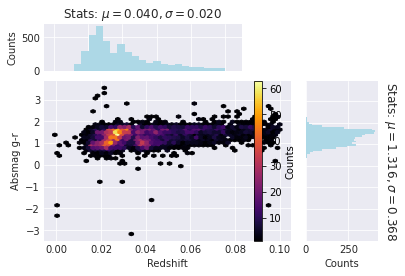

In [16]:
# make a scatter plot
fig, ax, histdata = r.plot('z', 'absmag_g_r')

By default, it will also plot histograms of the column as well.  This can be turned off by setting `with_hist=False`.

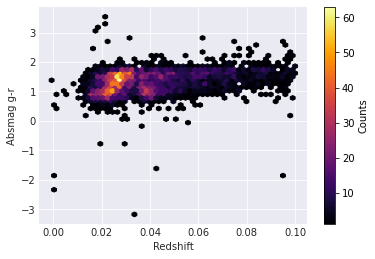

In [17]:
# make only a scatter plot
fig, ax = r.plot('z', 'absmag_g_r', with_hist=False)

We can also quickly plot a histogram of a single column of data using the ``hist`` method, which uses an underlying [hist utility function](https://sdss-marvin.readthedocs.io/en/latest/tools/utils/plot-hist.html).    

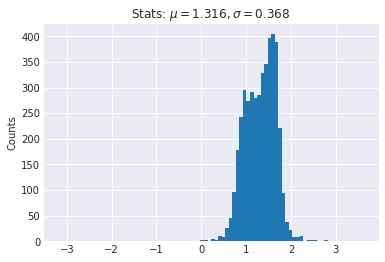

In [18]:
histdata, fig, ax = r.hist('absmag_g_r')

<a id='download'></a>
## Downloading Results
You can download the raw files from your results using the ``download`` method.  This uses the ``downloadList`` utility function under the hood.  By default this will download the DRP cubes for each target row.  It accepts any keyword arguments as ``downloadList``.

In [19]:
# download the DRP datacube files from the results 
# r.download()

## Additional Resoures
- Get a refresher on [Queries](https://sdss-marvin.readthedocs.io/en/latest/query/query.html)
- See more details of what you can do with [Results](https://sdss-marvin.readthedocs.io/en/latest/query/results.html#using-results)
- See the [Results API](https://sdss-marvin.readthedocs.io/en/latest/reference/queries.html#marvin-results-ref) for a look at the Marvin Results object.